### In this file I am exploring the data, datatypes, data definations
    1) Data types should match data defination
    2) are there any null values?
    3) if yes, can they be imputed or should be dropped?
    4) is null value in reponse. response should be dropped.
    5) univariate anaysis of continious variables
    6) how many and what unique value are there in categorical variables

In [74]:
import pandas as pd
import numpy as np

In [75]:
data = pd.read_csv("Data\CarPrice_Assignment.csv")

In [76]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### There are no values in data as shown below. 

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [80]:
data.isnull().sum().sum()

0

#### Reading data definations

In [89]:
data_description = pd.read_excel('Data\Data Dictionary - carprices.xlsx')

In [90]:
data_description=data_description.iloc[3:28,[7,11]]
data_description.columns=['var','desc']

In [91]:
pd.set_option('display.max_colwidth', -1)
data_description

,var,desc
3,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
4,carCompany,Name of car company (Categorical)
5,fueltype,Car fuel type i.e gas or diesel (Categorical)
6,aspiration,Aspiration used in a car (Categorical)
7,doornumber,Number of doors in a car (Categorical)
8,carbody,body of car (Categorical)
9,drivewheel,type of drive wheel (Categorical)
10,enginelocation,Location of car engine (Categorical)
11,wheelbase,Weelbase of car (Numeric)
12,carlength,Length of car (Numeric)


In [92]:
data_description['var']=data_description['var'].apply(lambda x:x.strip().lower())

### Checking categorical varaibles and checking if they are perfectly described or not. they shoul be type object and look any data inconsistency

In [93]:
data[['car_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
car_ID    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [94]:
data['car_ID'].value_counts().describe()

count    205.0
mean     1.0  
std      0.0  
min      1.0  
25%      1.0  
50%      1.0  
75%      1.0  
max      1.0  
Name: car_ID, dtype: float64

### carID I will drop as there are 205 different each with only one example.

In [95]:
data=data.iloc[:,1:]

In [96]:
data[['symboling']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
symboling    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


### symboling need to be changed to category

In [97]:
data[['symboling']]=data[['symboling']].astype('category')

In [98]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2    3 
Name: symboling, dtype: int64

#### very less example in under -2. In anlysisng this varible with response, I will check if come levels can be grouped toghther

In [99]:
data_description=data_description.reset_index()

In [100]:
data_description[data_description['var'] == 'symboling']

,index,var,desc
0,3,symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"


#### value associated with -2 very less and no -3

In [101]:
data['CarName'].value_counts()

peugeot 504                  6
toyota corona                6
toyota corolla               6
subaru dl                    4
toyota mark ii               3
mitsubishi g4                3
honda civic                  3
mitsubishi mirage g4         3
mazda 626                    3
mitsubishi outlander         3
honda accord                 2
volvo 244dl                  2
isuzu D-Max                  2
porsche cayenne              2
plymouth fury iii            2
volkswagen dasher            2
subaru                       2
saab 99gle                   2
peugeot 604sl                2
nissan rogue                 2
bmw 320i                     2
bmw x3                       2
mazda glc                    2
toyota corolla 1200          2
saab 99e                     2
nissan clipper               2
mazda rx-4                   2
mazda glc deluxe             2
nissan latio                 2
volvo 145e (sw)              2
                            ..
subaru r2                    1
jaguar x

### This vaiable will not have good impact on regression as number of categories is very high but obs within category is very low. Can we extract brand names? Parked for later analysis

In [102]:
data['fueltype'].value_counts()

gas       185
diesel    20 
Name: fueltype, dtype: int64

In [103]:
data['fueltype'].value_counts()

gas       185
diesel    20 
Name: fueltype, dtype: int64

### very low claues for diesel. 

In [104]:
data_description[data_description['var']=='aspiration']

,index,var,desc
3,6,aspiration,Aspiration used in a car (Categorical)


In [105]:
data['aspiration'].value_counts()

std      168
turbo    37 
Name: aspiration, dtype: int64

std works on atmospheric pressure where as turbo A turbocharger, colloquially known as a turbo, is a turbine-driven, forced induction device that increases an internal combustion engine's efficiency and power output by forcing extra compressed air into the combustion chamber

In [106]:
data['doornumber'].value_counts()

four    115
two     90 
Name: doornumber, dtype: int64

In [107]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop        8 
convertible    6 
Name: carbody, dtype: int64

In [108]:
data['drivewheel'].value_counts()

fwd    120
rwd    76 
4wd    9  
Name: drivewheel, dtype: int64

In [110]:
data['enginelocation'].value_counts()

front    202
rear     3  
Name: enginelocation, dtype: int64

In [111]:
data['drivewheel'].value_counts()

fwd    120
rwd    76 
4wd    9  
Name: drivewheel, dtype: int64

#### some categories have  very low values. We may need to group them. I will check it later during scatter and categorical plots with response

In [112]:
data[['wheelbase']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
wheelbase    205 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [113]:
data[['carheight']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
carheight    205 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [114]:
data[['carwidth']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
carwidth    205 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [115]:
data[['curbweight']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
curbweight    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [116]:
data_description['var'].unique()

array(['symboling', 'carcompany', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price(dependent variable)'], dtype=object)

In [117]:
data[['enginetype']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
enginetype    205 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


In [118]:
data['enginetype'].value_counts()

ohc      148
ohcf     15 
ohcv     13 
l        12 
dohc     12 
rotor    4  
dohcv    1  
Name: enginetype, dtype: int64

#### rotor and dohcv have very low numbers. grouping may be required

In [119]:
data[['cylindernumber']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
cylindernumber    205 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


In [120]:
data['cylindernumber'].value_counts()

four      159
six       24 
five      11 
eight     5  
two       4  
twelve    1  
three     1  
Name: cylindernumber, dtype: int64

#### same prolem with cylinder number , fuelsystem  grouping may be required


In [125]:
data[['enginesize']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
enginesize    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [126]:
data[['fuelsystem']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
fuelsystem    205 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


In [127]:
data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi    9 
4bbl    3 
mfi     1 
spfi    1 
Name: fuelsystem, dtype: int64

In [128]:
data.iloc[:,17:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
dtypes: float64(4), int64(4)
memory usage: 12.9 KB


In [129]:
data_numeric=data.select_dtypes(include=[np.number])

In [130]:
data_cat=data.select_dtypes(exclude=[np.number])

In [131]:
data_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Analyzing Numerical Varaiables using unvariate plots. checking distribution and looking for outliers.

In [132]:
import seaborn as sns

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\prateek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


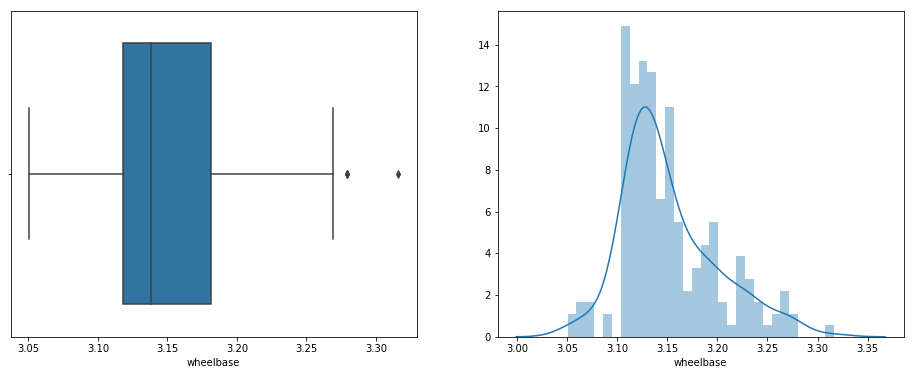

In [134]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.power(data_numeric['wheelbase'],1/4),ax=ax[0])
sns.distplot(np.power(data_numeric['wheelbase'],1/4),bins=30,ax=ax[1])

plt.show()

In [135]:
data_cat[data['wheelbase']>114]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,ohc,five,idi
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
73,0,buick century special,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
109,0,peugeot 504 (sw),gas,std,four,wagon,rwd,front,l,four,mpfi
110,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,l,four,idi
113,0,peugeot 504,gas,std,four,wagon,rwd,front,l,four,mpfi
114,0,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,l,four,idi


### nothing spcl about outliers here. Though lets extract company names

In [136]:
data['brandName']=data['CarName'].apply(lambda x:x.split(' ')[0].lower().strip())

In [137]:
data['brandName'].value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge          9 
volkswagen     9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
isuzu          4 
porsche        4 
alfa-romero    3 
chevrolet      3 
jaguar         3 
renault        2 
vw             2 
maxda          2 
toyouta        1 
porcshce       1 
mercury        1 
vokswagen      1 
Name: brandName, dtype: int64

In [138]:
data.loc[(data['brandName']=='vw' )| (data['brandName']=='vokswagen')|(data['brandName']=='porcshce')|(data['brandName']=='porsche'),'brandName']='volkswagen'

In [139]:
data.loc[(data['brandName']=='toyouta' ),'brandName']='toyota'
 

In [140]:
data.loc[(data['brandName']=='maxda' ),'brandName']='mazda'

In [141]:
data['brandName'].value_counts()

toyota         32
nissan         18
mazda          17
volkswagen     17
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge          9 
buick          8 
bmw            8 
plymouth       7 
audi           7 
saab           6 
isuzu          4 
chevrolet      3 
jaguar         3 
alfa-romero    3 
renault        2 
mercury        1 
Name: brandName, dtype: int64

C:\Users\prateek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


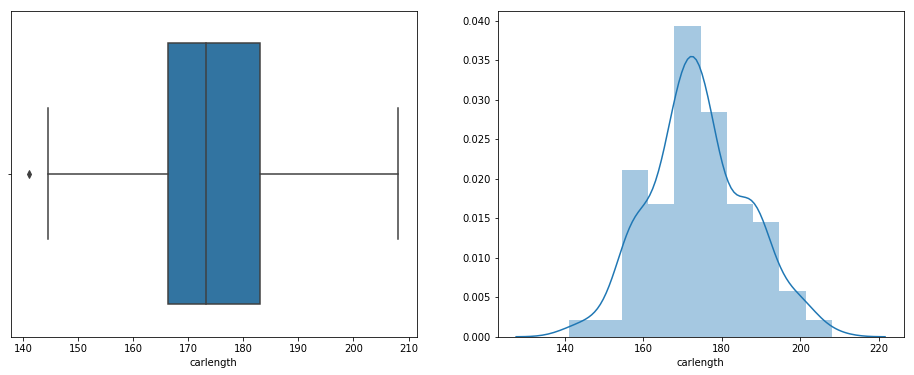

In [143]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carlength'],ax=ax[0])
sns.distplot(data_numeric['carlength'],bins=10,ax=ax[1])

plt.show()

In [144]:
data_cat[data['carlength']<143]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl


C:\Users\prateek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


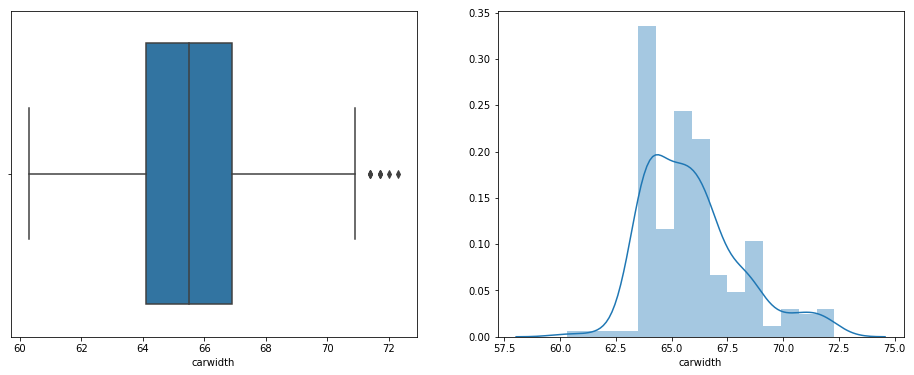

In [145]:

fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carwidth'],ax=ax[0])
sns.distplot(data_numeric['carwidth'],bins=15,ax=ax[1])

plt.show()

In [146]:
data_cat[data['carwidth']>71]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
6,1,audi 100ls,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,1,audi 5000,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,ohc,five,idi
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
73,0,buick century special,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,ohcv,eight,mpfi
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi


### Luxury Brand are outliers above?

C:\Users\prateek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


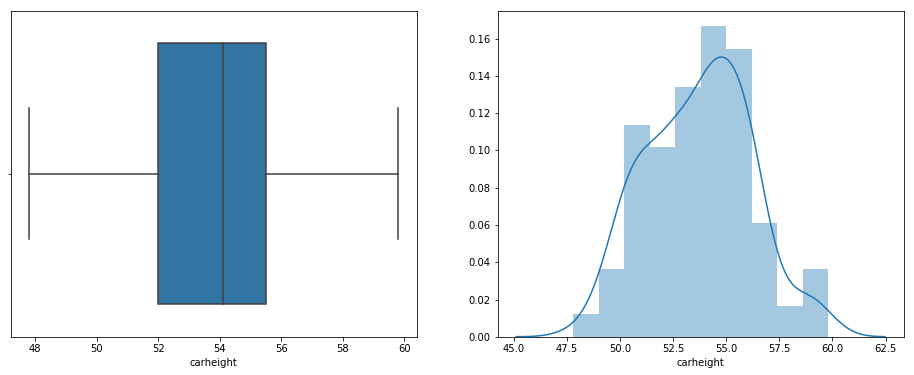

In [147]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carheight'],ax=ax[0])
sns.distplot(data_numeric['carheight'],bins=10,ax=ax[1])

plt.show()

C:\Users\prateek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


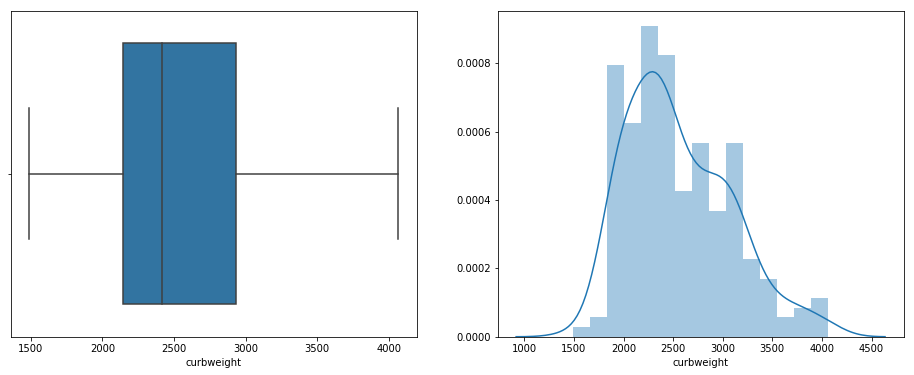

In [148]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['curbweight'],ax=ax[0])
sns.distplot(data_numeric['curbweight'],bins=15,ax=ax[1])

plt.show()

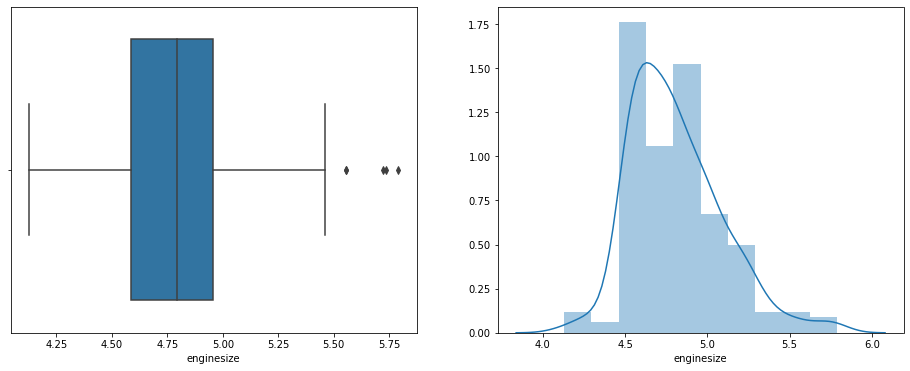

In [59]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric['enginesize']+1),ax=ax[0])
sns.distplot(np.log(data_numeric['enginesize']+1),bins=10,ax=ax[1])

plt.show()

### This feature is more skewed then others. Might need transfrmation in later stages

### outliers seems to be from luxury brands

In [60]:
data[data_numeric['enginesize']>200].sort_values('enginesize')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,175.7,...,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5,volkswagen
15,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
17,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,180.3,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
47,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
48,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,199.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,buick
73,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick


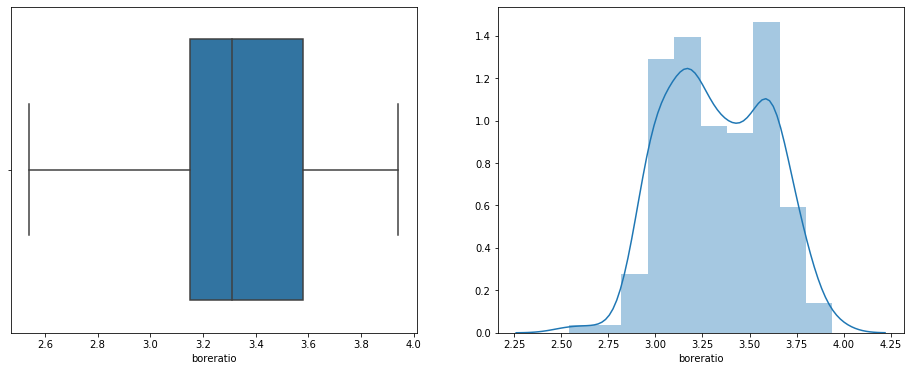

In [61]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['boreratio'],ax=ax[0])
sns.distplot(data_numeric['boreratio'],bins=10,ax=ax[1])

plt.show()

### looks bimodal. check with categorical variables?. will check at bottom of this file

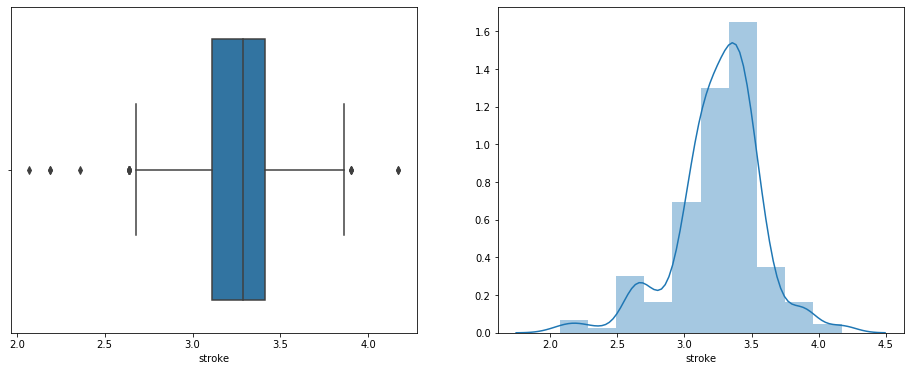

In [62]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['stroke'],ax=ax[0])
sns.distplot(data_numeric['stroke'],bins=10,ax=ax[1])

plt.show()

In [63]:
data_cat[data_numeric['stroke']>3.9]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
47,0,jaguar xj,gas,std,four,sedan,rwd,front,dohc,six,mpfi
48,0,jaguar xf,gas,std,four,sedan,rwd,front,dohc,six,mpfi


In [64]:
data_numeric['stroke'].describe()["25%"]+1.5*(data_numeric['stroke'].describe()["25%"]-data_numeric['stroke'].describe()["75%"])

2.6599999999999993

In [65]:
pd.set_option('display.max_columns',100)

In [66]:
data[data_numeric['stroke']<2.60].sort_values('stroke')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
134,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0,saab
111,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0,peugeot
113,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0,peugeot
138,2,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0,subaru


### outliers at both end. we will ke an eye for this later stages

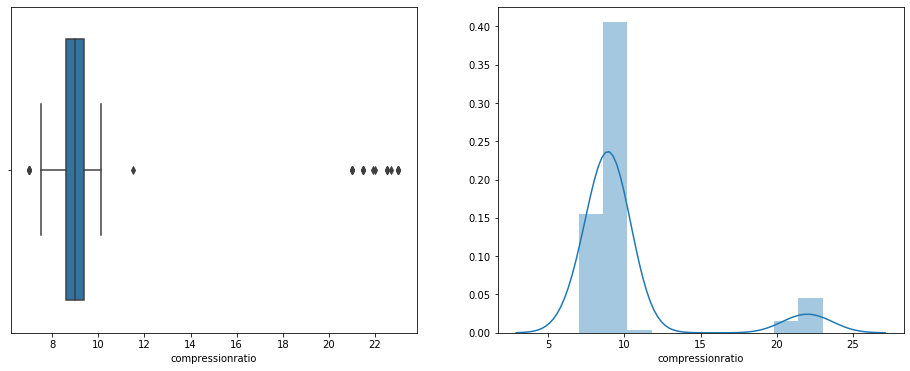

In [67]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['compressionratio'],ax=ax[0])
sns.distplot(data_numeric['compressionratio'],bins=10,ax=ax[1])

plt.show()

### bimodal beacuse of fuletype

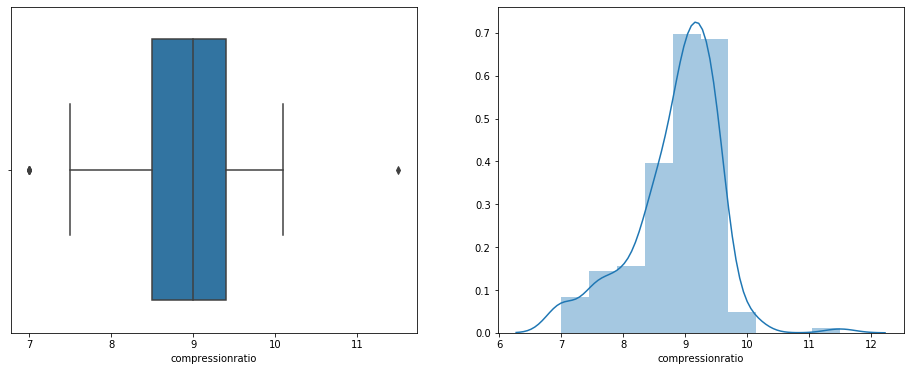

In [68]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[data['fueltype']=='gas','compressionratio'],ax=ax[0])
sns.distplot(data_numeric.loc[data['fueltype']=='gas','compressionratio'],bins=10,ax=ax[1])

plt.show()

In [69]:
data[(data['fueltype']=='gas')&(data['compressionratio']>11)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
49,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar


In [70]:
data[(data['fueltype']=='gas')&(data['compressionratio']<=7)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi
29,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964.000,dodge
82,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833,ohc,four,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.000,mitsubishi
83,3,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2921,ohc,four,156,spdi,3.59,3.86,7.0,145,5000,19,24,14869.000,mitsubishi
84,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2926,ohc,four,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489.000,mitsubishi
117,0,peugeot 604sl,gas,turbo,four,sedan,rwd,front,108.0,186.7,68.3,56.0,3130,l,four,134,mpfi,3.61,3.21,7.0,142,5600,18,24,18150.000,peugeot
124,3,plymouth duster,gas,turbo,two,hatchback,rwd,front,95.9,173.2,66.3,50.2,2818,ohc,four,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764.000,plymouth


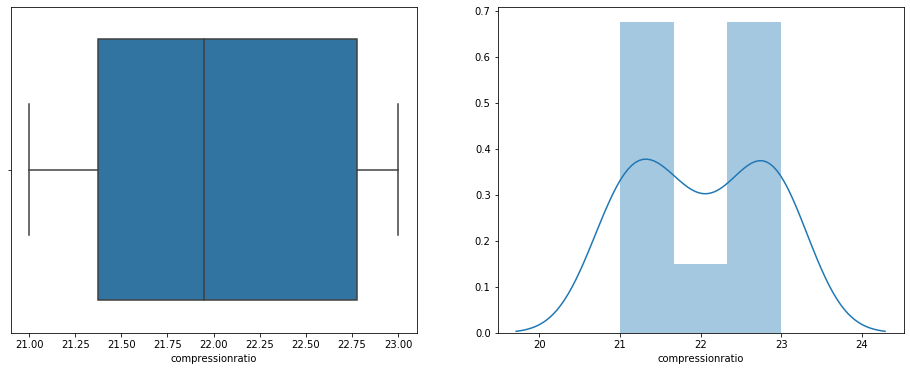

In [71]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[data['fueltype']=='diesel','compressionratio'],ax=ax[0])
sns.distplot(data_numeric.loc[data['fueltype']=='diesel','compressionratio'],bins=3,ax=ax[1])

plt.show()

In [72]:
data_numeric.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

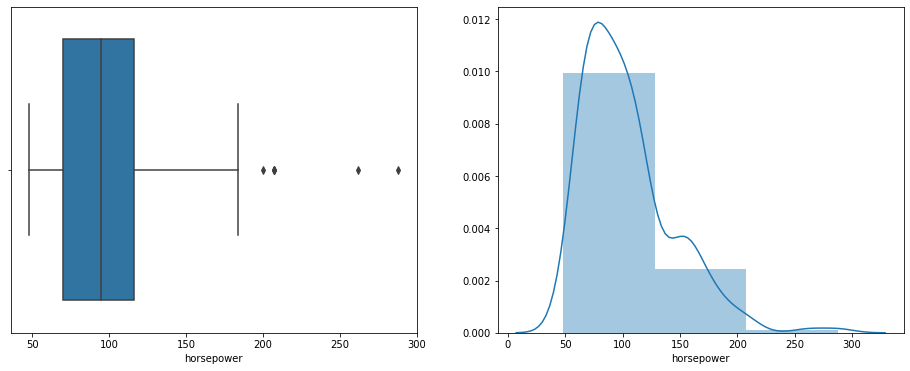

In [73]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'horsepower'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'horsepower'],bins=3,ax=ax[1])

plt.show()

### this also somewhat high skewed

In [74]:
data_numeric['horsepower'].describe()["75%"]-1.5*(data_numeric['horsepower'].describe()["25%"]-data_numeric['horsepower'].describe()["75%"])

185.0

In [75]:
data_cat[data_numeric['horsepower']>185]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
49,0,jaguar xk,gas,std,two,sedan,rwd,front,ohcv,twelve,mpfi
105,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,ohcv,six,mpfi
126,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,ohcf,six,mpfi
127,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,ohcf,six,mpfi
128,3,porsche boxter,gas,std,two,convertible,rwd,rear,ohcf,six,mpfi
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi


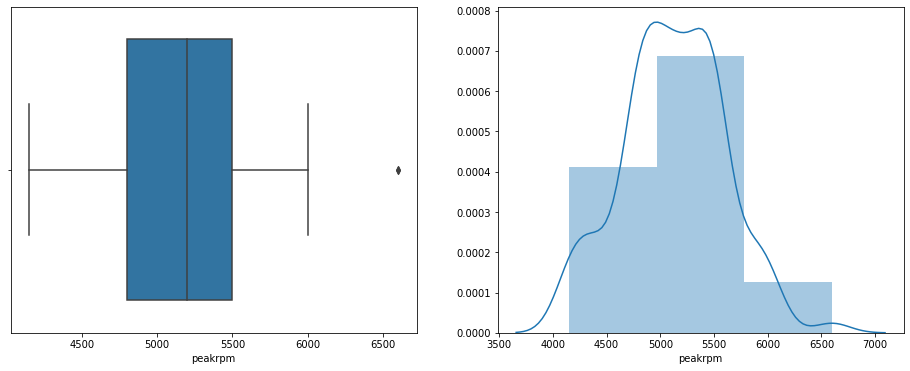

In [76]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'peakrpm'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'peakrpm'],bins=3,ax=ax[1])

plt.show()

In [77]:
data_cat[data_numeric['peakrpm']>6500]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
165,1,toyota celica gt liftback,gas,std,two,sedan,rwd,front,dohc,four,mpfi
166,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,dohc,four,mpfi


In [78]:
data[(data['price']==18280.00)|(data['price']==41315.00)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
65,0,mazda glc,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280.0,mazda


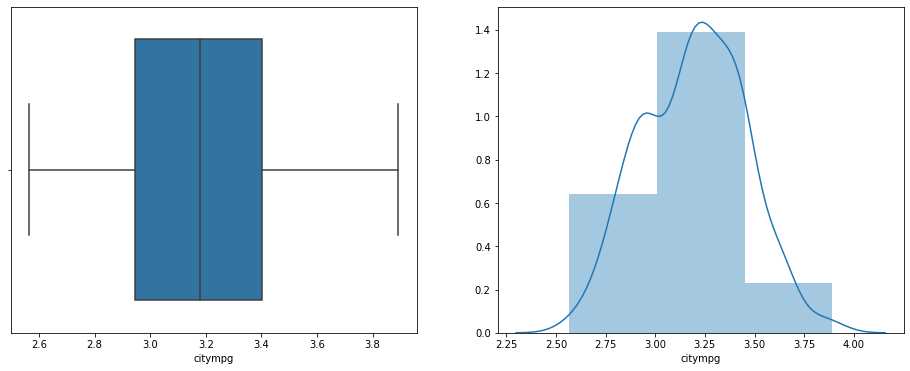

In [79]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric.loc[:,'citympg']),ax=ax[0])
sns.distplot(np.log(data_numeric.loc[:,'citympg']),bins=3,ax=ax[1])

plt.show()

### log of citmpg remove outliers and is more normal

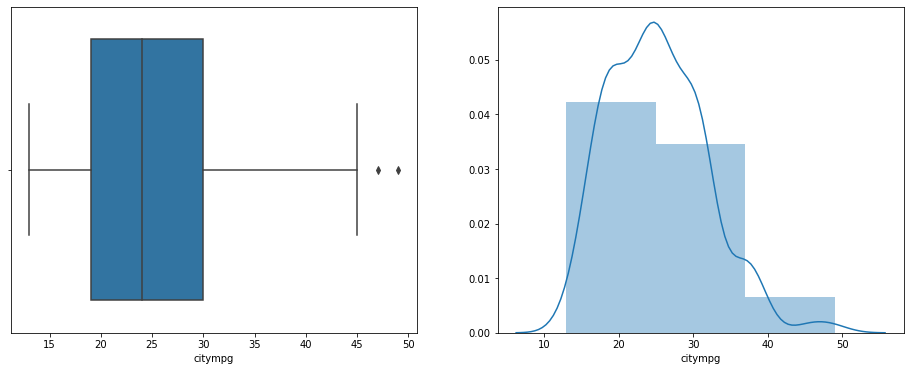

In [80]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'citympg'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'citympg'],bins=3,ax=ax[1])

plt.show()

In [81]:
data_cat[data_numeric['citympg']>45]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl
30,2,honda civic,gas,std,two,hatchback,fwd,front,ohc,four,1bbl


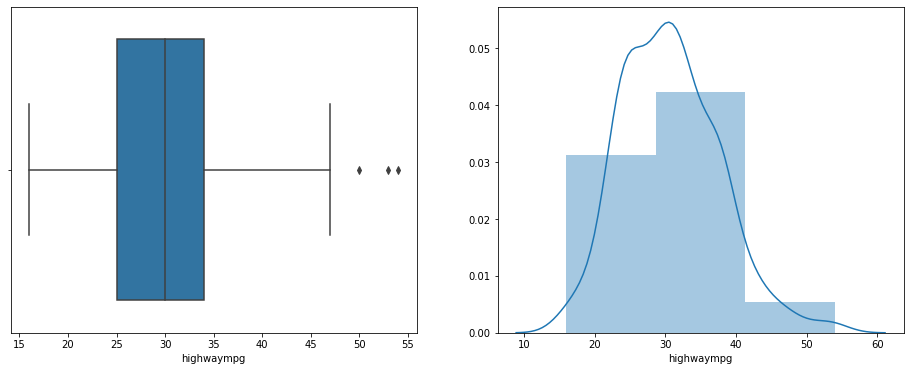

In [82]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'highwaympg'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'highwaympg'],bins=3,ax=ax[1])

plt.show()

In [83]:
data_cat[data_numeric['highwaympg']>47]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl
30,2,honda civic,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
90,1,nissan gt-r,diesel,std,two,sedan,fwd,front,ohc,four,idi


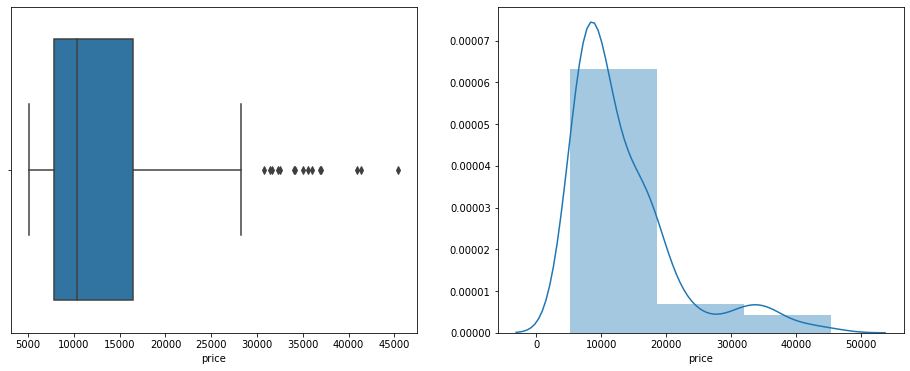

In [84]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'price'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'price'],bins=3,ax=ax[1])

plt.show()

C:\Users\prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\prateek\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\prateek\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

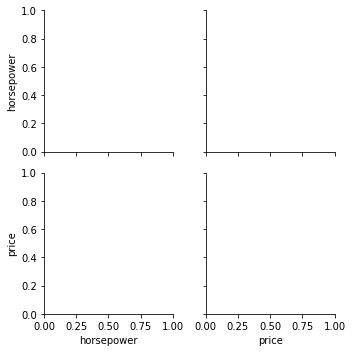

In [73]:
data['price']=np.log(data['price'])-np.log(data['price']).mean()
data['horsepower']=np.log(data['horsepower'])-np.log(data['horsepower']).mean()
sns.pairplot(data[['horsepower','price']])
plt.show()

In [85]:
data[data_numeric.price>29500].sort_values('price')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
15,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5,volkswagen
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
47,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
126,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0,volkswagen
127,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0,volkswagen
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
48,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
49,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar


In [86]:
data.iloc[65,:]


symboling           0        
CarName             mazda glc
fueltype            gas      
aspiration          std      
doornumber          four     
carbody             sedan    
drivewheel          rwd      
enginelocation      front    
wheelbase           104.9    
carlength           175      
carwidth            66.1     
carheight           54.4     
curbweight          2670     
enginetype          ohc      
cylindernumber      four     
enginesize          140      
fuelsystem          mpfi     
boreratio           3.76     
stroke              3.16     
compressionratio    8        
horsepower          120      
peakrpm             5000     
citympg             19       
highwaympg          27       
price               18280    
brandName           mazda    
Name: 65, dtype: object

### price is skewed. will check transformation at later stages

In [87]:
data[(data['price']==18280.00)|(data['price']==15040.00)|(data['price']==34184.00)|((data['price']==45400.00)|(data['price']==41315.00))]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
65,0,mazda glc,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280.0,mazda
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,buick
134,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0,saab


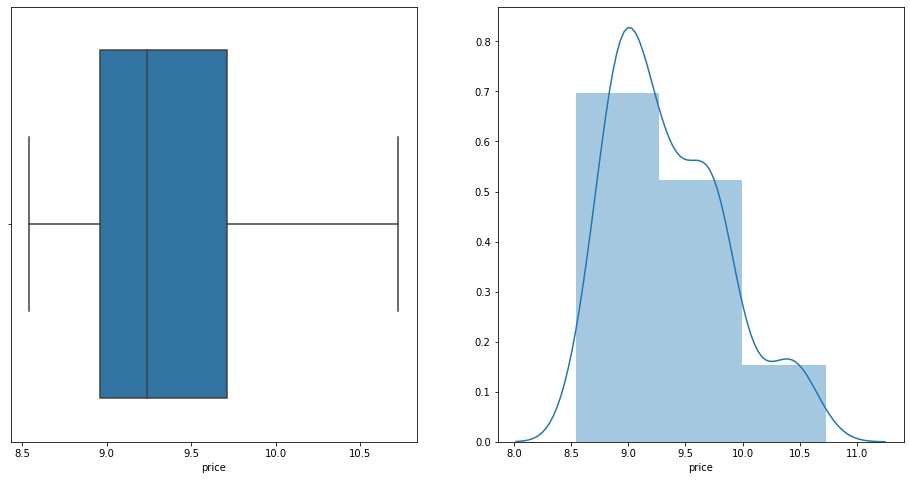

In [88]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 8))
sns.boxplot(np.log(data_numeric.loc[:,'price']),ax=ax[0])
sns.distplot(np.log(data_numeric.loc[:,'price']),bins=3,ax=ax[1])

plt.show()

## cluster analysis in R with gower's distance. for only cluster analysis i will transform varaibles

In [89]:
data.iloc[65,]

symboling           0        
CarName             mazda glc
fueltype            gas      
aspiration          std      
doornumber          four     
carbody             sedan    
drivewheel          rwd      
enginelocation      front    
wheelbase           104.9    
carlength           175      
carwidth            66.1     
carheight           54.4     
curbweight          2670     
enginetype          ohc      
cylindernumber      four     
enginesize          140      
fuelsystem          mpfi     
boreratio           3.76     
stroke              3.16     
compressionratio    8        
horsepower          120      
peakrpm             5000     
citympg             19       
highwaympg          27       
price               18280    
brandName           mazda    
Name: 65, dtype: object

In [90]:
data['brandName']=data['CarName'].apply(lambda x:x.split(' ')[0].lower().strip())

data.loc[(data['brandName']=='vw' )| (data['brandName']=='vokswagen'),'brandName']='volkswagen'


data.loc[(data['brandName']=='porcshce')|(data['brandName']=='porsche'),'brandName']='porsche'

data.loc[(data['brandName']=='toyouta' ),'brandName']='toyota'

In [91]:
data_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [92]:
data2=pd.read_csv('Data\data_train.csv')

In [93]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2    3 
Name: symboling, dtype: int64

In [94]:
data2['symboling'].value_counts()

 0    51
 1    45
 2    27
 3    22
-1    17
-2    3 
Name: symboling, dtype: int64

In [95]:
1,2,3,9,5,10,6,7

(1, 2, 3, 9, 5, 10, 6, 7)

In [96]:
##maxda & mercury

In [103]:
data.iloc[[16,18,74,17],:]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0,chevrolet
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,buick
17,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw


In [105]:
data[data['brandName']=='bmw'].sort_values('price')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
10,2,bmw 320i,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0,bmw
11,0,bmw 320i,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925.0,bmw
12,0,bmw x1,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970.0,bmw
13,0,bmw x3,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105.0,bmw
14,1,bmw z4,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.0,bmw
15,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
17,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw


In [108]:
data[data['brandName']=='chevrolet'].sort_values('price')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0,chevrolet
19,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295.0,chevrolet
20,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575.0,chevrolet


In [109]:
data[data['brandName']=='buick'].sort_values('price')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
67,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0,buick
69,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,buick
68,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0,buick
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
73,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,buick


In [111]:
data_num=data.select_dtypes(include=[np.number])

data_num=data_num.iloc[:,1:]

data_cat=data.select_dtypes(exclude=[np.number])

In [113]:
data_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName'],
      dtype='object')

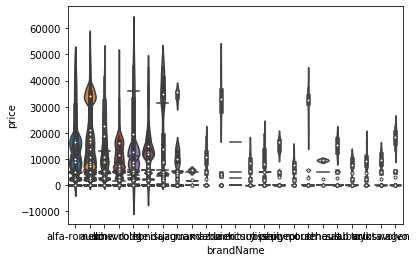

In [115]:
for a in data_cat[['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName']].columns:
    for b in data_num:
        sns.violinplot(data = data, x=a, y=b)
        
